# Heart Attack Dataset (Exploratory Data Analysis and Prediction)

O que será utilizado:
1. Pandas para leitura da base de dados;
2. Matplotlib para criação de gráficos;
3. Sklearn Linear Model para Regressão Linear Múltipla

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Base de dados

In [6]:
df = pd.read_csv("Medicaldataset.csv")

# Análise Exploratória dos Dados (EDA)

In [7]:
# Primeiras 5 linhas do Dataset
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [8]:
# Informações gerais do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [9]:
# Descrição do dataset com contagem, média, etc
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [10]:
# Dimensões do Dataset
print(f"Dimensões do Dataset: {df.shape[0]} linhas e {df.shape[1]} colunas.") # É possível observar que é um dataset bidimensional

Dimensões do Dataset: 1319 linhas e 9 colunas.


In [11]:
# Quantidade de elementos do Dataset
print(f"Quantidade de elementos do Dataset: {df.size} elementos.")

Quantidade de elementos do Dataset: 11871 elementos.


In [12]:
# Verificando valores nulos
df.isnull().sum() # É possível verificar que não há valores nulos no Dataset

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


In [13]:
# Verificando se há linhas duplicadas
df.duplicated().sum()

np.int64(0)

# Distribuição de Resultados de Ataques Cardíacos Gerais

<BarContainer object of 2 artists>

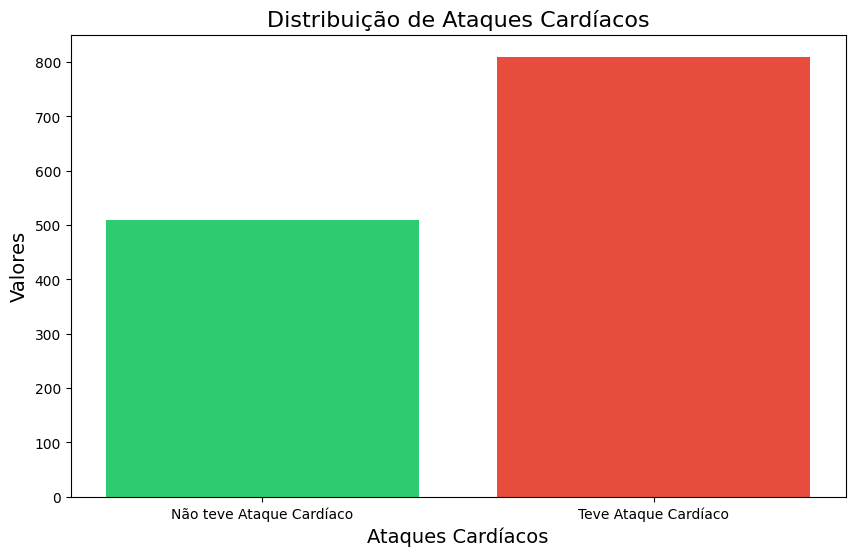

In [14]:
# Criando gráfico de porcentagem de resultados de ataques cardíacos
resultados = df['Result'].value_counts().sort_index()
label_resultados = ['Não teve Ataque Cardíaco', 'Teve Ataque Cardíaco']
cores = ['#2ecc71', '#e74c3c']

# Criando o gráfico
plt.figure(figsize= (10, 6))
plt.title("Distribuição de Ataques Cardíacos", fontsize=16)
plt.xlabel("Ataques Cardíacos", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.bar(label_resultados, resultados.values, color=cores)


# Seção 1: Distribuição de Resultados de Ataques Cardíacos por Gênero

In [15]:
# Dataframe contendo apenas Gênero e Resultado
gender_df = df[['Gender', 'Result']]

# male_df -> Armazena apenas os resultados positivos e negativos do gênero masculino
# female_df -> Armazena apenas os resultados positivos e negativos do gênero feminino
male_df = gender_df.query('Gender == 1')
female_df = gender_df.query('Gender == 0')

# Quantidade de resultados por tipo (ex: x negativos, y positivos)
male_results = male_df.value_counts().sort_index()
female_results = female_df.value_counts().sort_index()

<BarContainer object of 2 artists>

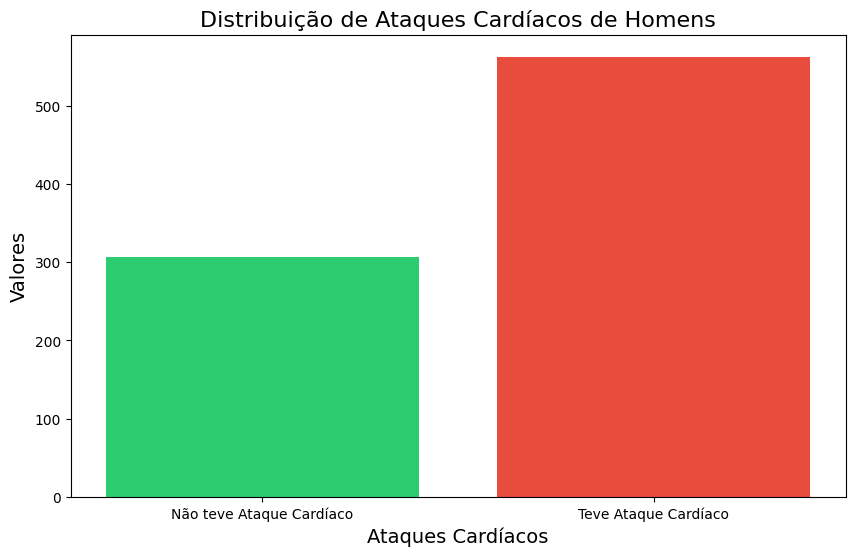

In [16]:
# Criação de gráfico contendo os resultados masculinos
plt.figure(figsize= (10, 6))
plt.title("Distribuição de Ataques Cardíacos de Homens", fontsize=16)
plt.xlabel("Ataques Cardíacos", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.bar(label_resultados, male_results.values, color=cores)

<BarContainer object of 2 artists>

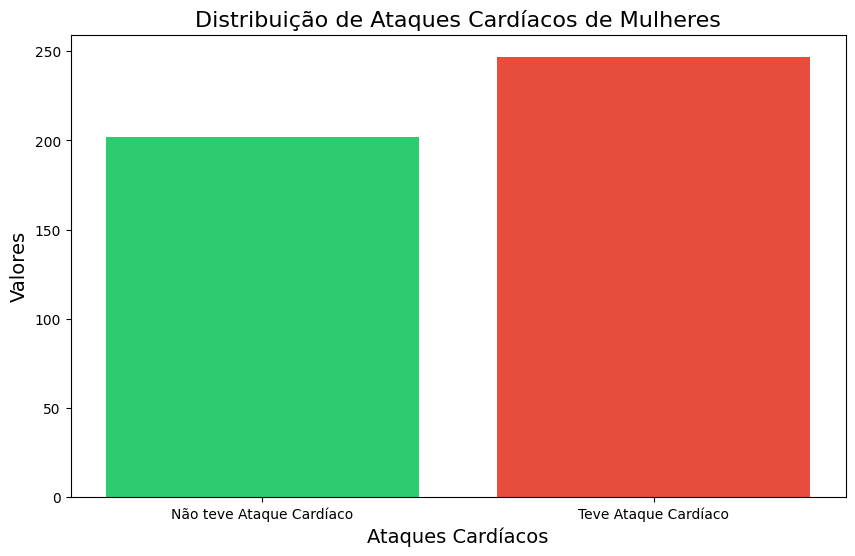

In [17]:
# Criação do gráfico contendo resultados femininos
plt.figure(figsize= (10, 6))
plt.title("Distribuição de Ataques Cardíacos de Mulheres", fontsize=16)
plt.xlabel("Ataques Cardíacos", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.bar(label_resultados, female_results.values, color=cores)

<BarContainer object of 2 artists>

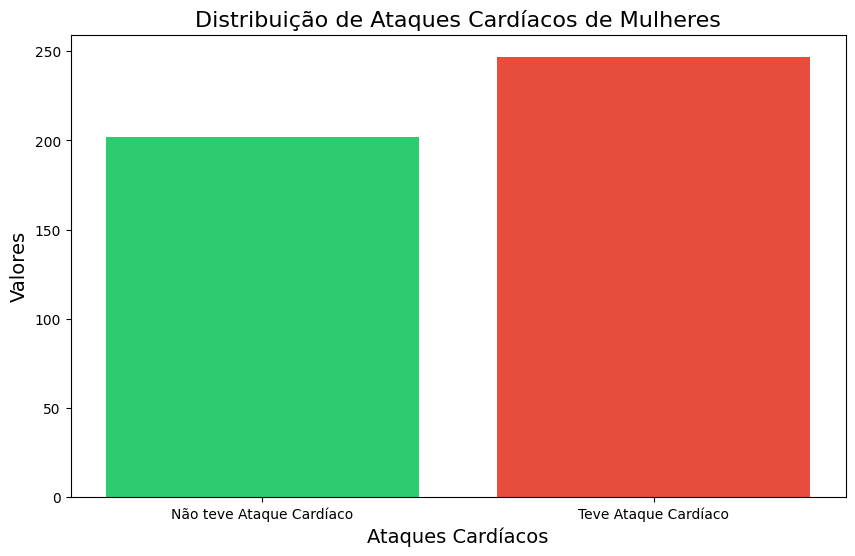

In [18]:
# Criação do gráfico contendo resultados femininos
plt.figure(figsize= (10, 6))
plt.title("Distribuição de Ataques Cardíacos de Mulheres", fontsize=16)
plt.xlabel("Ataques Cardíacos", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.bar(label_resultados, female_results.values, color=cores)

# 1.1. Sumário dos resultados masculinos e femininos

In [19]:
# Porcentagem de mulheres
female_positive_percentage = (female_results.iloc[1] / female_results.sum() * 100).round(2)
female_negative_percentage = (female_results.iloc[0] / female_results.sum() * 100).round(2)

# Porcentagem de homens
male_positive_percentage = (male_results.iloc[1] / male_results.sum() * 100).round(2)
male_negative_percentage = (male_results.iloc[0] / male_results.sum() * 100).round(2)

In [20]:
# Printa a quantidade de homens, quantidade de ataques cardíacos positivos e negativos
print("=============================================================================")
print(f"Quantidade total de homens: {male_results.sum()}")
print(f"Porcentagem de homens que tiveram ataques cardíacos: {male_positive_percentage}% ({male_results.iloc[1].sum()} homens)")
print(f"Quantidade de homens que não tiveram ataques cardíacos: {male_negative_percentage}% ({male_results.iloc[0].sum()} homens)")
print("=============================================================================")
# Printa a quantidade de mulheres, quantidade de ataques cardíacos positivos e negativos
print(f"Quantidade total de mulheres: {female_results.sum()}")
print(f"Porcentagem de mulheres que tiveram ataques cardíacos: {female_positive_percentage}% ({female_results.iloc[1].sum()} mulheres)")
print(f"Quantidade de mulheres que não tiveram ataques cardíacos: {female_negative_percentage}% ({female_results.iloc[0].sum()} mulheres)")
print("=============================================================================")
print(f"Diferença de porcentagem entre testes positivos masculinos e femininos: {(male_positive_percentage - female_positive_percentage).round(2)}%")
print("=============================================================================")

Quantidade total de homens: 870
Porcentagem de homens que tiveram ataques cardíacos: 64.71% (563 homens)
Quantidade de homens que não tiveram ataques cardíacos: 35.29% (307 homens)
Quantidade total de mulheres: 449
Porcentagem de mulheres que tiveram ataques cardíacos: 55.01% (247 mulheres)
Quantidade de mulheres que não tiveram ataques cardíacos: 44.99% (202 mulheres)
Diferença de porcentagem entre testes positivos masculinos e femininos: 9.7%


In [21]:
# Gráfico de sumário dos resultados Masculinos e Femininos
# gender_summary =

# 1.2. O que é possível extrair desses resultados?

- A quantidade de homens e mulheres examinados não é igual, entretanto, podemos ver que há uma clara diferença na quantidade de homens que tiveram ataques cardíacos e na quantidade de mulheres que tiveram ataques cardíacos.
- Por exemplo, a porcentagem de homens que tiveram ataque cardíacos é 64.71% contra 55.01% de ataques cardíacos femininos, uma diferença de 9.7%, se aproximando a 10%.
- Isso significa que, de forma geral, os homens estão mais propícios a ter ataques cardíacos em comparação as mulheres, mesmo levando em conta a diferença na quantidade de homens e mulheres examinados.


# Seção 2: Distribuição de Ataques Cardíacos por Idade

<h1>Será que a idade afeta?</h1>

Para verificar essa hipótese, irei utilizar 3 grupos de idade:
- Grupo 1: até os 45 anos;
- Grupo 2: entre 46-59 anos;
- Grupo 3: acima de 59 anos;

PS: Originalmente, os grupos de idade eram até 25 anos, entre 25-59 anos, e acima de 59 anos. Entretanto, ao verificar os elementos da tabela para melhor apuração, pude notar que haviam pouquíssimos registros até a idade escolhida. Justamente para haver uma melhor comparação entre esses grupos de idade, ajustei adequadamente.

In [22]:
age_df = df[['Age', 'Result']]
age_df

,Age,Result
0,64,negative
1,21,positive
2,55,negative
3,64,positive
4,55,negative
...,...,...
1314,44,negative
1315,66,positive
1316,45,positive
1317,54,positive


In [23]:
# Cria um novo dataframe contendo registros com idades abaixo de 45 anos
max_45_df = age_df.query('Age <= 45')

# Cria um novo dataframe com idade entre 46 e 59 anos
max_59_df = age_df.query('Age > 45 & Age <= 59')

# Cria um novo dataframe contendo apenas os registros com idade acima de 59 anos
min_60_df = age_df.query('Age > 59')

In [24]:
print(f"Quantidade de elementos do Dataframe até 45 anos de idade: {max_45_df.size}")
print(f"Quantidade de elementos do Dataframe entre 46-59 anos de idade: {max_59_df.size}")
print(f"Quantidade de elementos do Dataframe acima de 59 anos de idade: {min_60_df.size}")

Quantidade de elementos do Dataframe até 45 anos de idade: 586
Quantidade de elementos do Dataframe entre 46-59 anos de idade: 812
Quantidade de elementos do Dataframe acima de 59 anos de idade: 1240


<BarContainer object of 2 artists>

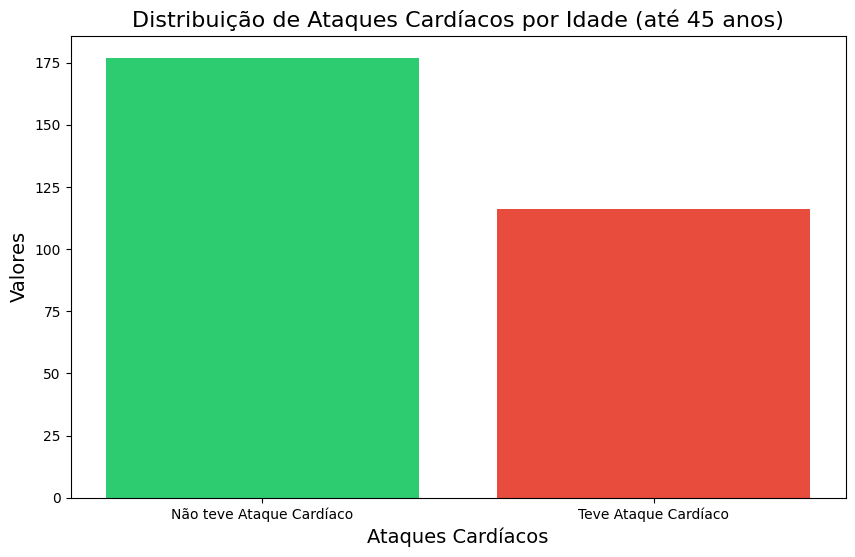

In [25]:
# Armazena os resultados negativos e positivos
max_45_results = max_45_df['Result'].value_counts().sort_index()

# Cria o gráfico de distribuição por idade (até 45 anos)
plt.figure(figsize= (10, 6))
plt.title("Distribuição de Ataques Cardíacos por Idade (até 45 anos)", fontsize=16)
plt.ylabel("Valores", fontsize=14)
plt.xlabel("Ataques Cardíacos", fontsize=14)
plt.bar(label_resultados, max_45_results.values, color=cores)

<BarContainer object of 2 artists>

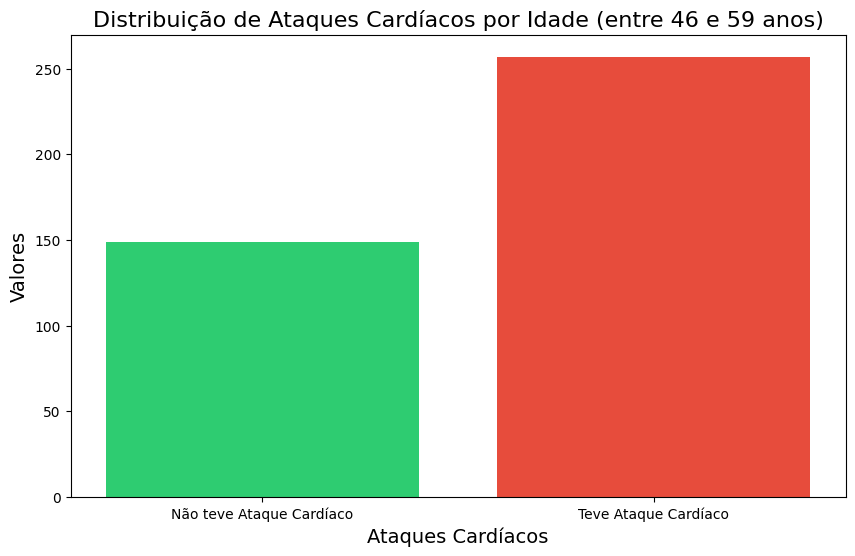

In [26]:
# Armazena os resultados negativos e positivos
max_59_results = max_59_df['Result'].value_counts().sort_index()

# Cria o gráfico de distribuição por idade (até 59 anos)
plt.figure(figsize= (10, 6))
plt.title("Distribuição de Ataques Cardíacos por Idade (entre 46 e 59 anos)", fontsize=16)
plt.ylabel("Valores", fontsize=14)
plt.xlabel("Ataques Cardíacos", fontsize=14)
plt.bar(label_resultados, max_59_results.values, color=cores)

<BarContainer object of 2 artists>

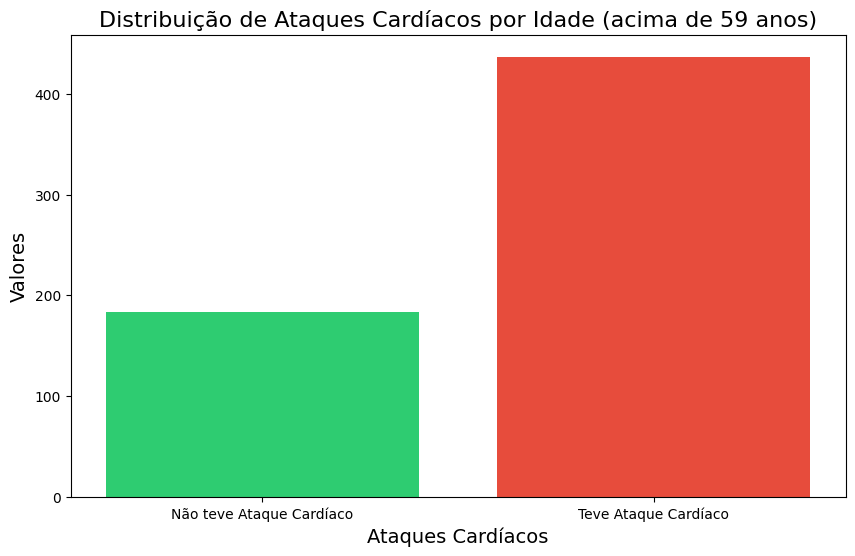

In [27]:
# Armazena os resultados negativos e positivos
min_60_results = min_60_df['Result'].value_counts().sort_index()

# Cria o gráfico de distribuição por idade (acima de 59 anos)
plt.figure(figsize= (10, 6))
plt.title("Distribuição de Ataques Cardíacos por Idade (acima de 59 anos)", fontsize=16)
plt.ylabel("Valores", fontsize=14)
plt.xlabel("Ataques Cardíacos", fontsize=14)
plt.bar(label_resultados, min_60_results.values, color=cores)

# 2.1. Sumário dos resultados por Grupo de Idade

<h4>Lembrando quais são os grupos:</h4>

- Grupo 1: até os 45 anos;
- Grupo 2: entre 46-59 anos;
- Grupo 3: acima de 59 anos;

In [28]:
# Nota: índice 0 -> negativo ||| índice 1 -> positivo
# Porcentagem do Grupo 1 (até 45 anos):
grp1_negative = (max_45_results.iloc[0] / max_45_results.sum() * 100).round(2)
grp1_positive = (max_45_results.iloc[1] / max_45_results.sum() * 100).round(2)

# Porcentagem do Grupo 2 (46-59 anos):
grp2_negative = (max_59_results.iloc[0] / max_59_results.sum() * 100).round(2)
grp2_positive = (max_59_results.iloc[1] / max_59_results.sum() * 100).round(2)

# Porcentagem do Grupo 3 (acima de 59 anos):
grp3_negative = (min_60_results.iloc[0] / min_60_results.sum() * 100).round(2)
grp3_positive = (min_60_results.iloc[1] / min_60_results.sum() * 100).round(2)

In [29]:
# Printa os resultados positivos e negativos do Grupo 1 em porcentagem
print("===============================================================================")
print(f"Quantidade total do Grupo 1: {max_45_results.sum()}")
print(f"Porcentagem do Grupo 1 que tiveram ataque cardíaco: {grp1_positive}% ({max_45_results.iloc[1].sum()} pessoas)")
print(f"Porcentagem do Grupo 1 que não tiveram ataques cardíacos: {grp1_negative}% ({max_45_results.iloc[0].sum()} pessoas)")
print("===============================================================================")

# Printa os resultados positivos e negativos do Grupo 2 em porcentagem
print(f"Quantidade total do Grupo 2: {max_59_results.sum()}")
print(f"Porcentagem do Grupo 2 que tiveram ataques cardíacos: {grp2_positive}% ({max_59_results.iloc[1].sum()} pessoas)")
print(f"Porcentagem do Grupo 2 que não tiveram ataques cardíacos: {grp2_negative}% ({max_59_results.iloc[0].sum()} pessoas)")
print("===============================================================================")

# Printa os resultados positivos e negativos do Grupo 3 em porcentagem
print(f"Quantidade total do Grupo 3: {min_60_results.sum()}")
print(f"Porcentagem do Grupo 3 que tiveram ataques cardíacos: {grp3_positive}% ({min_60_results.iloc[1].sum()} pessoas)")
print(f"Porcentagem do Grupo 3 que não tiveram ataques cardíacos: {grp3_negative}% ({min_60_results.iloc[0].sum()} pessoas)")
print("===============================================================================")
print(f"Total de pessoas avaliadas: {max_45_results.sum() + max_59_results.sum() + min_60_results.sum()}")

Quantidade total do Grupo 1: 293
Porcentagem do Grupo 1 que tiveram ataque cardíaco: 39.59% (116 pessoas)
Porcentagem do Grupo 1 que não tiveram ataques cardíacos: 60.41% (177 pessoas)
Quantidade total do Grupo 2: 406
Porcentagem do Grupo 2 que tiveram ataques cardíacos: 63.3% (257 pessoas)
Porcentagem do Grupo 2 que não tiveram ataques cardíacos: 36.7% (149 pessoas)
Quantidade total do Grupo 3: 620
Porcentagem do Grupo 3 que tiveram ataques cardíacos: 70.48% (437 pessoas)
Porcentagem do Grupo 3 que não tiveram ataques cardíacos: 29.52% (183 pessoas)
Total de pessoas avaliadas: 1319


In [30]:
# Grupo 1: <= 45 anos ||| Grupo 2: > 46 anos <= 59 anos ||| Grupo 3: > 60 anos
# Criando o DataFrame que contém os resultados positivos dos três grupos
summary_age_df = pd.DataFrame({'Grupo 1 (Positivo)': [float(grp1_positive)], 'Grupo 2 (Positivo)': [float(grp2_positive)], 'Grupo 3 (Positivo)': [float(grp3_positive)]}, index=['%'])

# Setando os labels do gráfico e as cores do gráfico
summary_age_label = ['Grupo 1', 'Grupo 2', 'Grupo 3']
summary_age_colors = ['#90EE90', '#FFD700', '#e74c3c']

summary_age_df

,Grupo 1 (Positivo),Grupo 2 (Positivo),Grupo 3 (Positivo)
%,39.59,63.3,70.48


<BarContainer object of 3 artists>

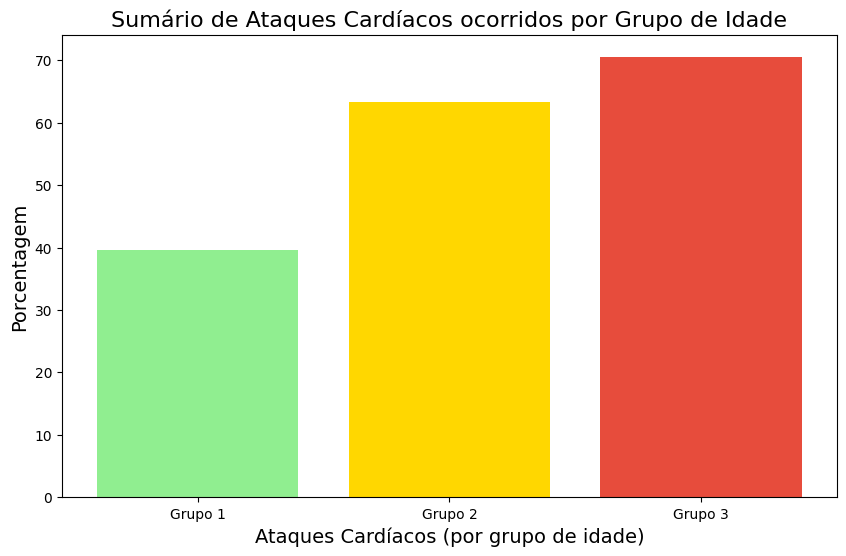

In [31]:
# Criando o gráfico de sumário de ataques cardíacos ocorridos por grupo de idade
plt.figure(figsize=(10, 6))
plt.title("Sumário de Ataques Cardíacos ocorridos por Grupo de Idade", fontsize=16)
plt.xlabel("Ataques Cardíacos (por grupo de idade)", fontsize=14)
plt.ylabel("Porcentagem", fontsize=14)
plt.bar(summary_age_label, summary_age_df.values[0], color=summary_age_colors)


# 2.2. O que podemos extrair desses resultados?

Três grupos diferentes de idade foram comparados, sendo eles: grupo 1 (até 45 anos de idade), grupo 2 (46-59 anos de idade), grupo 3 (acima de 59 anos de idade). <br>
- Um total de 1319 pessoas foram avaliadas, sendo  293 do primeiro grupo, 406 do segundo grupo e 620 do terceiro.
- No primeiro grupo, isto é, até os 45 anos de idade, 39.59% dos pacientes tiveram ataque cardíaco.
- No segundo grupo, isto é, dos 46 anos de idade até os 59 anos de idade, 63.3% dos pacientes tiveram ataque cardíaco.
- No terceiro grupo, isto é, acima dos 59 anos, 70.48% dos pacientes tiveram ataque cardíaco.

<br>
<h5>Com essas informações, podemos classificar os três grupos com diferentes prioridades. <br>
É perceptível que conforme o indivíduo vai ficando mais velho, maior a possibilidade de ter um ataque cardíaco, assim como vemos pelas estatísticas apresentadas.
Com isso, a sugestão seria definir o Grupo 1 como prioridade baixa, o Grupo 2 como prioridade média e o Grupo 3 como prioridade alta.
</h5>

# Predição com Regressão Linear Múltipla:

<h1>Esta seção ainda não foi iniciada. <br>
Quando será iniciada: ao concluir a seção de EDA.</h1>

<h1>Fórmulas a serem utilizadas:</h1>
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \varepsilon
$$

- $(y)$ variável dependente  
- $(x_j)$ variáveis independentes  
- $(\beta_j)$ coeficientes a serem estimados  
- $(\varepsilon)$ termo de erro